<div style="color:black; background-color:#FFF3E9; border: 1px solid #FFE0C3; border-radius: 10px; margin-bottom:1rem">
    <p style="margin:1rem; padding-left: 1rem; line-height: 2.5;">
        ©️ <b><i>Copyright 2023 @ Authors</i></b><br/>
        作者：<a style="font-weight:bold" href="mailto:bshan@mail.hust.edu.cn">斯坦福大厨 📨 </a><br>
        日期：2023-08-09<br/>
        <img src="https://github.com/stanfordbshan/CompMatBook/blob/main/author.png?raw=true" width="100"/>
        共享协议：本作品采用<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">知识共享署名-非商业性使用-相同方式共享 4.0 国际许可协议</a>进行许可。</i><br/>
    </p>
</div>

恭喜您已经发现了这份神奇的计算材料学课件！这份课件是我在熬夜吃掉不计其数的披萨和咖啡后创作出来的，配套的教材是由单斌、陈征征、陈蓉合著的《计算材料学--从算法原理到代码实现》。学习资料合集您可以在这个网址找到：[www.materialssimulation.com/book](http://www.materialssimulation.com/book)，您也可以跟着up主[无人问津晦涩难懂的B站视频](https://space.bilibili.com/1111135013/channel/collectiondetail?sid=1458375)一起进行学习。希望它能帮您在计算材料学的道路上摔得不那么痛。

就像您尊重那些一边烘焙披萨一边写代码的大厨一样，当您使用这份课件时，请：

- 记得告诉大家这份课件是斯坦福大厨写的，并且他在华中科技大学微纳中心工作
- 别用它去赚大钱，这个课件是用来学习的，不是用来买披萨的
- 保持开放共享的精神




如果你有关于计算材料学的想法，或者你只是想和我讨论最好吃的披萨口味，欢迎通过邮件 bshan@mail.hust.edu.cn 联系我。

# 目录（对应《计算材料学》章节3.1.12）

<a href="https://item.jd.com/10089064828853.html"><img src="https://github.com/stanfordbshan/CompMatBook/blob/main/cover.png?raw=true"  width="200"/></a>
<a href="https://item.jd.com/10089064828853.html">点击购买</a>

* [STO](#STObasics)
    * [1. STO定义](#STObasics)
    * [2. 交叠积分](#overlap)
    * [3. 积分方法的MC评估](#mcIntegral)
* [GTO](#GTObasics)
    * [1. GTO定义](#GTObasics)
    * [2. 算法步骤](#GTOalgo)
* [参考](#references)

<a name='STObasics'></a>
# 1. Slater Type Orbitals

斯莱特型轨道（Slater Type Orbitals, STOs）是用于描述电子在原子或分子中的行为的一种数学函数。这种函数在量子化学和分子模拟中有着广泛的应用，特别是在哈特里-福克（Hartree-Fock）方法中。STOs具有解析性质，这使得它们在计算中相对容易处理。

STO的一般形式是：

$$
\psi(\mathbf{r}) = N \left( \frac{Z}{a_0} \right)^{\frac{n}{2}} r^{(n-1)} e^{-Zr/a_0} Y_l^m(\theta, \phi)
$$

其中，$ \mathbf{r} = (r, \theta, \phi) $ 是球坐标系下的坐标，$ N $ 是归一化常数，$ Z $ 是有效核电荷，$ a_0 $ 是玻尔半径，$ n $ 是主量子数，$ Y_l^m(\theta, \phi) $ 是球谐函数。

几个关键参数：

- $ N $：归一化常数，确保轨道函数满足归一化条件。
- $ Z $：有效核电荷，描述了原子核对电子的有效吸引力。
- $ a_0 $：玻尔半径，是一个物理常数。
- $ n $：主量子数，描述了电子所处的能级。
- $ Y_l^m(\theta, \phi) $：球谐函数，描述了电子的角动量。

## a) 1s STO

最简单的斯莱特型轨道（Slater Type Orbital, STO）是\(1s\)轨道，通常表示为$\psi_{1s}(\mathbf{r}; \zeta_a, \mathbf{R}_a)$。在这个表达式中，$\mathbf{r}$是电子的位置矢量，$\zeta_a$是一个称为轨道指数的参数，$\mathbf{R}_a$是与轨道相关联的原子或核$a$的位置矢量。

$1s$ STO的函数形式为：

$$
\psi_{1s}(\mathbf{r}; \zeta_a, \mathbf{R}_a) = \sqrt{\frac{1}{\pi}} \zeta_a^{3/2} e^{-\zeta_a |\mathbf{r} - \mathbf{R}_a|}
$$

其中，$ |\mathbf{r} - \mathbf{R}_a| $是电子和核$a$之间的距离。

关键特点：

- $ \zeta_a $：轨道指数控制电子云的扩散。更大的$\zeta_a$意味着电子更靠近核局域化。

- $ \mathbf{R}_a $：与轨道局域化的原子或核$a$的位置矢量。在分子计算中，这将是分子中特定原子的位置。

$1s$ STO是球对称的，这意味着它只依赖于距离核$r$的距离，而不依赖于角度$\theta$和$\phi$。这使得它在涉及类氢原子或离子的计算中特别简单和有用。

$1s$ STO通常用作构建哈特里-福克和其他量子化学方法中更复杂分子轨道的基础模块。尽管它很简单，但它捕捉了电子局域化的基本物理性质，并为更复杂的系统提供了合理的第一近似。

接下来我们来进行STO 1s轨道的可视化

In [ ]:
import numpy as np

def STO_1s(r, Ra, zeta):
    """
    Compute the value of the 1s Slater-type orbital (STO) at a given position.

    Parameters:
    r: np.ndarray or float
        Position vector of electron.
    Ra: np.ndarray or float
        Position vector of the nucleus (center of the STO).
    zeta: float
        Orbital exponent.

    Returns:
    float
        Value of the 1s STO at the given position.
    """

    # Calculate distance between electron and nucleus
    distance = np.linalg.norm(r - Ra)

    # Calculate the normalization constant
    N = ( zeta**1.5 ) * np.sqrt(1/np.pi)

    # Compute the value of the STO
    value = N * np.exp(-zeta * distance)

    return value



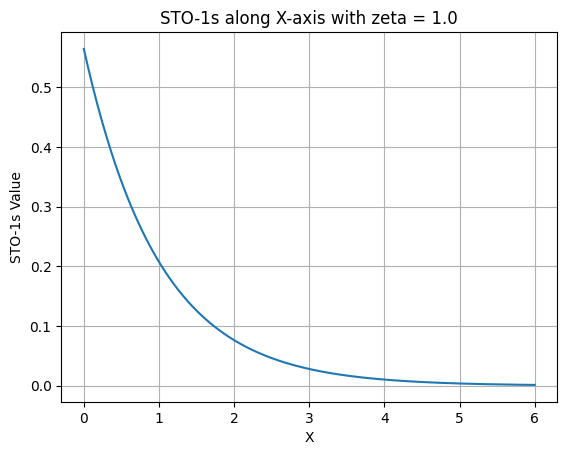

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def visualize_STO_1s_1D(zeta):
    # Define a 1D grid along the x-axis
    x = np.linspace(0, 6, 500)

    # Initialize an array to store the STO values
    values = np.zeros(x.shape)

    # Center of the orbital
    Ra = np.array([0, 0, 0])

    # Evaluate the STO function at each point along the x-axis
    for i, x_val in enumerate(x):
        r = np.array([x_val, 0, 0])
        values[i] = STO_1s(r, Ra, zeta)

    # Create a figure
    plt.figure()

    # Plot the STO values
    plt.plot(x, values)

    # Add labels and title
    plt.xlabel('X')
    plt.grid(True)
    plt.ylabel('STO-1s Value')
    plt.title(f'STO-1s along X-axis with zeta = {zeta}')

    plt.show()

# Visualize STO-1s with a zeta value of 1.0
visualize_STO_1s_1D(1.0)


<a name="overlap"></a>
## b) Slater的交叠积分

两个1s Slater型轨道（STO）之间的重叠积分 $ S $ 可以写作：

$$
S = \int d\tau \, \psi_{1s}(\mathbf{r}; \zeta_a, \mathbf{R}_a) \psi_{1s}(\mathbf{r}; \zeta_b, \mathbf{R}_b)
$$

对于1s STO，$\psi_{1s}(\mathbf{r}; \zeta, \mathbf{R}) = \zeta^{3/2} \sqrt{\frac{1}{\pi}} e^{-\zeta |\mathbf{r} - \mathbf{R}|}$。

将这些代入积分中，我们得到：

$$
S = \int d\tau \left( \zeta_a^{3/2} \sqrt{\frac{1}{\pi}} e^{-\zeta_a |\mathbf{r} - \mathbf{R}_a|} \right) \left( \zeta_b^{3/2} \sqrt{\frac{1}{\pi}} e^{-\zeta_b |\mathbf{r} - \mathbf{R}_b|} \right)
$$

简化后：

$$
S = \zeta_a^{3/2} \zeta_b^{3/2} \frac{1}{\pi} \int d\tau \, e^{-\zeta_a |\mathbf{r} - \mathbf{R}_a| - \zeta_b |\mathbf{r} - \mathbf{R}_b|}
$$

我们可以转换到球坐标，并选择z轴，使其与 $ \mathbf{R}_b - \mathbf{R}_a $ 对齐。这样，表达式 $ |\mathbf{r} - \mathbf{R}_a| $ 和 $ |\mathbf{r} - \mathbf{R}_b| $在 $ r, \theta, \phi $ 方面会更容易处理。

当然，让我用中文和您指定的LaTeX符号进行解释。

首先，我们考虑两个中心位于 $ \mathbf{R}_a = [0, 0, 0] $ 和 $ \mathbf{R}_b = [0, 0, 1] $ 的1s Slater型轨道（STO）之间的重叠积分 $ S $。该积分 $ S $ 最初可以定义为笛卡尔坐标中的：

$$
S = \int dx \, dy \, dz \, \psi_{1s}(\mathbf{r}; \zeta_a, \mathbf{R}_a) \psi_{1s}(\mathbf{r}; \zeta_b, \mathbf{R}_b)
$$

对于我们正在考虑的特定STO，这是：

$$
S = \zeta_a^{3/2} \zeta_b^{3/2} \frac{1}{\pi} \int dx \, dy \, dz \, e^{-\zeta_a \sqrt{x^2 + y^2 + z^2}} e^{-\zeta_b \sqrt{x^2 + y^2 + (z-1)^2}}
$$

现在我们希望将这个积分转换为球坐标 $ (r, \theta, \phi)$。

从笛卡尔坐标 $ (x, y, z) $ 到球坐标 $ (r, \theta, \phi) $ 的变换的雅可比行列式是 $ r^2 \sin(\theta) $。

球坐标与笛卡尔坐标的关系为：

$$
\begin{aligned}
x &= r \sin(\theta) \cos(\phi) \\
y &= r \sin(\theta) \sin(\phi) \\
z &= r \cos(\theta)
\end{aligned}
$$

另外，请注意， $(z - 1)^2 = (r \cos(\theta) - 1)^2 $。

现在， $ S $ 变为：

$$
S = \zeta_a^{3/2} \zeta_b^{3/2} \frac{1}{\pi} \int_0^\infty dr \, r^2 \int_0^\pi d\theta \, \sin(\theta) \int_0^{2\pi} d\phi \, e^{-\zeta_a r} e^{-\zeta_b \sqrt{r^2 - 2 r \cos(\theta) + 1}}
$$

$ \phi $ 积分很直接，给出一个 $ 2\pi $ 的因子，剩下的是：

$$
S = 2\zeta_a^{3/2} \zeta_b^{3/2}  \int_0^\infty dr \, r^2 \int_0^\pi d\theta \, \sin(\theta) \, e^{-\zeta_a r -\zeta_b \sqrt{r^2 - 2 r \cos(\theta) + 1}}
$$

这就是球坐标中的重叠积分 $ S $。

我们可以利用球坐标变换简化后的双重积分表达式进行STO 1s交叠积分的计算

In [ ]:
from scipy.integrate import nquad
import numpy as np

# Define the integrand function
def integrand(theta, r):
    return 2* r**2 * np.sin(theta) * np.exp(-r - np.sqrt((r - np.cos(theta))**2 + 1 - np.cos(theta)**2))

# Perform numerical integration using nquad
result, error = nquad(integrand, [[0, np.pi], [0, np.inf]])

print(f"The overlap integral is: {result} error estimate: {error}")


The overlap integral is: 0.8583853626451877 error estimate: 1.1970699904363156e-08


也可以直接利用原定义进行积分计算

In [ ]:
import numpy as np

def STO_1s_overlap(x,y,z, zeta_a, zeta_b, Ra, Rb):
    """
    Calculate the overlap integral between two 1s Slater-type orbitals.

    Parameters:
    r: float
        position vector
    zeta_a: float
        Orbital exponent for orbital centered at Ra.
    zeta_b: float
        Orbital exponent for orbital centered at Rb.
    Ra: np.ndarray
        Position vector of nucleus a.
    Rb: np.ndarray
        Position vector of nucleus b.

    Returns:
    float
        Value of the overlap integral.
    """
    r = np.array([x,y,z])

    S1 = STO_1s(r, Ra, zeta_a)
    S2 = STO_1s(r, Rb, zeta_b)

    return S1*S2

# Example usage:
Ra = np.array([0, 0, 0])
Rb = np.array([0, 0, 1])
zeta_a = 1.0
zeta_b = 1.0

# Calculate the overlap integral
result, error = nquad(STO_1s_overlap, [[-np.inf, np.inf], [-np.inf, np.inf], [-np.inf, np.inf]], args=(zeta_a, zeta_b, Ra, Rb))

print(f"The overlap integral is: {result} error estimate: {error}")


The overlap integral is: 0.8583853630577125 error estimate: 1.4897306838924846e-08


<a name="mcIntegral"></a>
## c) 朴素蒙特卡洛方法计算STO交叠积分

使用朴素蒙特卡洛方法来评估斯莱特型轨道（STO）的重叠积分基本步骤如下：

1. **定义参数**：确定用于描述两个STO的参数，包括轨道指数（$\zeta_a$ 和 $\zeta_b$）和两个轨道中心的位置（$\mathbf{R}_a$ 和 $\mathbf{R}_b$）。

2. **随机采样**：在一个立方体空间内随机生成一定数量（$N$）的点。这个立方体应足够大，以包括两个STO的主要电子云区域。

3. **计算体积元素**：基于立方体的大小和采样点的数量，计算体积元素（$\Delta V$）。这通常是立方体体积除以点的数量。

4. **评估STO函数**：对于每一个随机生成的点，计算两个STO函数的值。

    - $ \text{Value}_a = \text{STO}_1(\text{Point}, \mathbf{R}_a, \zeta_a) $
    - $ \text{Value}_b = \text{STO}_2(\text{Point}, \mathbf{R}_b, \zeta_b) $

5. **计算重叠**：使用STO函数的值计算每个点的贡献，并将其加总。
$$
\text{Integral Value} = \Delta V \times \sum_{i=1}^{N} (\text{Value}_{a,i} \times \text{Value}_{b,i})
$$  

6. **返回结果**：得到的“Integral Value”即为两个STO的重叠积分的近似值。

这种方法的优点是实现简单，但缺点是精度较低，特别是当STO函数在空间中变化非常快时。为了提高精度，通常需要增加采样点的数量。

In [ ]:
import numpy as np

def STO_monte_carlo_overlap(zeta_a, zeta_b, Ra, Rb, num_points=1e8):
    """
    Calculate the overlap integral between two 1s Slater Type Orbitals (STOs)
    using Monte Carlo integration.

    Parameters
    ----------
    zeta_a : float
        Orbital exponent for the first STO centered at Ra.
    zeta_b : float
        Orbital exponent for the second STO centered at Rb.
    Ra : array_like
        Position vector of the nucleus for the first STO, shape (3,).
    Rb : array_like
        Position vector of the nucleus for the second STO, shape (3,).
    num_points : int, optional
        Number of Monte Carlo points to sample. Default is 1e8.

    Returns
    -------
    float
        The overlap integral between the two STOs.

    Notes
    -----
    This function assumes that the STOs are normalized.

    Examples
    --------
    >>> STO_monte_carlo_overlap(1.0, 1.0, [0, 0, 0], [0, 0, 0])
    Approximately 1 (for same STOs overlap should be 1)
    """

    num_points = int(num_points)

    # Generate random points in a cube surrounding the two centers
    max_dim = 10  # the maximum distance out to which we sample points (cube from -3 to +3 along each axis)
    points = np.random.uniform(-max_dim, max_dim, (num_points, 3))

    # Calculate the volume element based on the cube size
    volume_element = (2 * max_dim)**3 / num_points

    # Evaluate the STO functions at each point
    values_a = np.array([STO_1s(point, Ra, zeta_a) for point in points])
    values_b = np.array([STO_1s(point, Rb, zeta_b) for point in points])

    # Evaluate the integral
    integral_value = np.sum(values_a * values_b) * volume_element

    return integral_value


# Example usage
Ra = np.array([0, 0, 0])
Rb = np.array([0, 0, 1])
zeta_a = 1.0
zeta_b = 1.0
num_points = 1e6

overlap_value = STO_monte_carlo_overlap(zeta_a, zeta_b, Ra, Rb, num_points)
print(f"The Monte Carlo estimate for the overlap integral is: {overlap_value}")


The Monte Carlo estimate for the overlap integral is: 0.8626955105339398


## d)使用重要性抽样蒙特卡洛计算交叠积分

使用重要性抽样（Importance Sampling）的蒙特卡洛方法评估斯莱特型轨道（STO）的重叠积分的基本步骤如下：

1. **定义参数**：确定用于描述两个STO的参数，包括轨道指数（\(\zeta_a\) 和 \(\zeta_b\)）以及两个轨道中心的位置（\(\mathbf{R}_a\) 和 \(\mathbf{R}_b\)）。

2. **选择权重函数**：选择一个权重函数 \(w(x)\)，它应能近似地描述两个STO的重叠区域。通常，权重函数应易于积分并与待求积分函数有相似的特性。

3. **生成加权随机样本**：使用权重函数生成一组随机样本点。这通常涉及到从与权重函数成比例的概率分布中抽样。

4. **计算体积元素和权重**：对于每个随机点，计算体积元素（或者在这种情况下，概率密度函数的值）。

5. **评估STO函数**：在每个随机生成的点上评估两个STO函数的值。

    - $ \text{Value}_a = \text{STO}_1(\text{Point}, \mathbf{R}_a, \zeta_a) $
    - $ \text{Value}_b = \text{STO}_2(\text{Point}, \mathbf{R}_b, \zeta_b) $

6. **计算加权重叠**：使用STO函数的值和权重计算每个点的加权贡献，并加总。

$$
\text{Integral Value} = \sum_{i=1}^{N} \frac{\text{Value}_{a,i} \times \text{Value}_{b,i}}{w(\text{Point}_i)}
$$

7. **归一化和返回结果**：根据权重函数进行归一化，得到的“Integral Value”即为两个STO之间的重叠积分的近似值。

重要性抽样的优点是能够提供比朴素蒙特卡洛方法更精确的结果，特别是在函数在空间中变化很快或者具有尖峰的情况下。然而，选择合适的权重函数可能是一个挑战。

In [ ]:
def gaussian_sampling(center, sigma, num_points):
    return np.random.normal(loc=center, scale=sigma, size=(num_points, 3))

def importance_sampling_overlap(zeta_a, zeta_b, Ra, Rb, num_points=1e8):
    num_points = int(num_points)

    # Choose a center for the Gaussian sampling distribution
    center = (Ra + Rb) / 2

    # Choose a standard deviation for the Gaussian
    sigma = np.sqrt(1 / (zeta_a + zeta_b))

    # Generate random points using Gaussian sampling
    points = gaussian_sampling(center, sigma, num_points)

    # Evaluate the STO functions at each point
    values_a = np.array([STO_1s(point, Ra, zeta_a) for point in points])
    values_b = np.array([STO_1s(point, Rb, zeta_b) for point in points])

    # Calculate the PDF of the Gaussian at each point
    gaussian_pdf = 1 / ((2 * np.pi * sigma**2)**(3/2)) * np.exp(-np.sum((points - center)**2, axis=1) / (2 * sigma**2))

    # Evaluate the integral using importance sampling
    integral_value = np.sum(values_a * values_b / gaussian_pdf) / num_points

    return integral_value

# Example usage
Ra = np.array([0, 0, 0])
Rb = np.array([0, 0, 1])
zeta_a = 1.0
zeta_b = 1.0
num_points = 1e6

overlap_value = importance_sampling_overlap(zeta_a, zeta_b, Ra, Rb, num_points)
print(f"The importance sampling Monte Carlo estimate for the overlap integral is: {overlap_value}")


The importance sampling Monte Carlo estimate for the overlap integral is: 0.8490774284265379


<a name="GTObasics"></a>
# 2. Gaussian Type Orbitals

高斯型轨道（Gaussian Type Orbitals，GTOs）是用于描述电子在原子或分子中的行为的一种数学函数。与斯莱特型轨道（Slater Type Orbitals，STOs）相比，GTOs 在数值计算中更为高效，尤其是在处理多中心积分时。这主要是因为高斯函数的乘积和加法在积分运算中有更简单的解析形式。

高斯型轨道的一般形式为：

$$
\psi(\mathbf{r}) = N x^l y^m z^n e^{-\alpha r^2}
$$

其中，$ \mathbf{r} = (x, y, z) $ 是笛卡尔坐标，$ N $ 是归一化常数，$ \alpha $ 是高斯函数的宽度参数，$ l, m, n $ 是量子数，分别描述了轨道在 $ x, y, z $ 方向上的角动量。

几个关键参数：

- $ N $：归一化常数，确保轨道函数满足归一化条件。
- $ \alpha $：高斯宽度参数，描述了电子云的扩散程度。
- $ l, m, n $：分别描述了轨道在 $ x, y, z $ 方向上的角动量。

高斯型轨道优点主要是计算效率高，特别是在处理多电子系统和多中心积分时。局限性主要是不能精确地描述电子与核之间的库仑相互作用，通常需要使用多个高斯函数的线性组合来提高精度。

让我们首先定义一个1s类型的Gauss基函数

In [ ]:
def GTO_1s(r, Ra, alpha):
    """
    Compute the value of the 1s Gaussian-type orbital (GTO) at a given position.

    Parameters:
    r: np.ndarray or float
        Position vector of electron.
    Ra: np.ndarray or float
        Position vector of the nucleus (center of the GTO).
    alpha: float
        Orbital exponent.

    Returns:
    float
        Value of the 1s GTO at the given position.
    """

    # Calculate distance between electron and nucleus
    distance_squared = np.linalg.norm(r - Ra)**2

    # Calculate the normalization constant
    N = (2 * alpha / np.pi)**(3 / 4)

    # Compute the value of the GTO
    value = N * np.exp(-alpha * distance_squared)

    return value

# Test the function
r_test = np.array([0.1, 0.2, 0.9])
Ra_test = np.array([0, 0, 0])
alpha_test = 1.0

GTO_value = GTO_1s(r_test, Ra_test, alpha_test)
GTO_value


0.3015899309146682

## Gaussian的Overlap积分

与Slater基函数不同，两个 1s 高斯轨道（GTOs）之间的重叠积分可以直接通过解析方式计算。两个分别位于 $ \mathbf{A} $ 和 $ \mathbf{B} $、轨道指数分别为 $ \alpha $ 和 $ \beta $ 的 1s 高斯轨道之间的重叠积分的通用公式为：

$$
S = \left( \frac{2\sqrt{\alpha\beta}}{\alpha + \beta} \right)^{3/2} \exp\left( -\frac{\alpha \beta}{\alpha + \beta} |\mathbf{A} - \mathbf{B}|^2 \right)
$$



In [ ]:
import numpy as np

def integrand_gaussian_1s_analytical(alpha, beta, Ra, Rb):
    """Calculate the overlap integral for two 1s Gaussian orbitals
    centered at Ra and Rb with the same orbital exponent alpha and beta.
    """
    # Calculate the distance between the two centers
    distance_squared = np.linalg.norm(Ra - Rb)**2

    # Calculate the overlap integral using the analytical formula
    S = ((2*np.sqrt(alpha*beta) / (alpha + beta))**(3 / 2)) * np.exp(-((alpha * beta) / (alpha + beta)) * distance_squared)

    return S

# Test the function
# Test the function
alpha_test = 1.0
beta_test = 1.0
Ra_test = np.array([0, 0, 0])
Rb_test = np.array([0, 0, 1])

overlap_integral = integrand_gaussian_1s_analytical(alpha_test, beta_test, Ra_test, Rb_test)
overlap_integral


0.6065306597126334

我们可以用数值积分验证解析形式的正确性

In [ ]:
import numpy as np
from scipy.integrate import nquad

def GTO_1s_overlap(x, y, z, alpha, beta, Ra, Rb):
    """
    Calculate the overlap value at (x,y,z) between two 1s Gaussian-type orbitals.

    Parameters:
    x, y, z: float
        Coordinates of the point where the overlap is calculated.
    alpha, beta: float
        Orbital exponents for the two GTOs.
    Ra, Rb: np.ndarray or float
        Position vectors of the nuclei (centers of the GTOs).

    Returns:
    float
        Value of the overlap at the given point.
    """

    # Position vector for the point (x, y, z)
    r = np.array([x, y, z])

    # Calculate distance between point and each nucleus
    G1 = GTO_1s(r, Ra, alpha)
    G2 = GTO_1s(r, Rb, beta)

    return G1*G2

# Test the function
alpha, beta = 1.0, 1.0
Ra = np.array([0, 0, 0])
Rb = np.array([0, 0, 1])

# Calculate the overlap integral
result, error = nquad(GTO_1s_overlap, [[-np.inf, np.inf], [-np.inf, np.inf], [-np.inf, np.inf]], args=(alpha, beta, Ra, Rb))

print(f"The overlap integral is: {result}, error: {error}")


The overlap integral is: 0.6065306597186648, error: 1.4899109701329964e-08


# 3. 总结

斯莱特型轨道（Slater Type Orbitals, STOs）和高斯型轨道（Gaussian Type Orbitals, GTOs）是量子化学和分子模拟中用于描述电子云分布的两种主要数学函数。两者都有各自的优点和局限性，通常会根据特定应用的需求来选择使用哪一种。

**斯莱特型轨道（STOs）**

- **优点**：STOs 能更精确地模拟电子与核之间的相互作用，因此在理论上更符合物理现实。
- **局限性**：计算复杂度高，特别是在处理多中心积分时。这在大分子体系的模拟中可能会成为瓶颈。

**高斯型轨道（GTOs）**

- **优点**：计算效率高，特别是在处理多电子和多中心积分时。这使得 GTOs 在大规模量子化学计算中更受欢迎。
- **局限性**：不能很好地模拟电子与核的相互作用，通常需要使用多个高斯函数的线性组合（即复合高斯轨道）来提高精度。

在实际应用中，STOs 和 GTOs 常常会被结合使用。例如，在初步的量子化学计算中，可能会首先使用 GTOs 来进行快速的筛选和评估，然后再用 STOs 进行更精确的计算。另外，也有一些混合方法试图结合两者的优点，以实现既精确又高效的电子结构计算。

总体而言，STOs 和 GTOs 各有优缺点，选择哪一种取决于特定问题的需求，包括计算资源、精度要求以及所研究体系的复杂性。

当然，无论您是STO的铁杆粉丝，还是GTO的忠实拥趸，我们都知道，在量子化学的舞台上，这两位“明星”各有千秋。STO像是那位深情的诗人，每一个字、每一个句都追求完美，但总是让人等得太久。而GTO则像是流行歌手，虽然歌词不总是那么深刻，但绝对让人觉得耳目一新，难以忘怀。

所以，无论您选择哪一种，都请记得——在量子世界里，精确和效率往往是一对难舍难分的“老冤家”。希望您在这场“明星大战”中找到您的“真命天子”！祝科研愉快，不见不散！

<a name="references"></a>
# 4. 参考资料

- [本章节B站配套视频](https://www.bilibili.com/video/BV1hC4y1n7kD/)
- [Small Gaussian Expansions of Slater‐Type Orbitals](https://pubs.aip.org/aip/jcp/article-abstract/52/1/431/85134/Small-Gaussian-Expansions-of-Slater-Type-Orbitals?redirectedFrom=fulltext)